In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Задача 1

1.1. Скачать следующие данные: kc-house-data

In [30]:
df=pd.read_csv("kc_house_data.csv", sep=',', encoding='windows-1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

1.2. Изучите распределение стоимости недвижимости

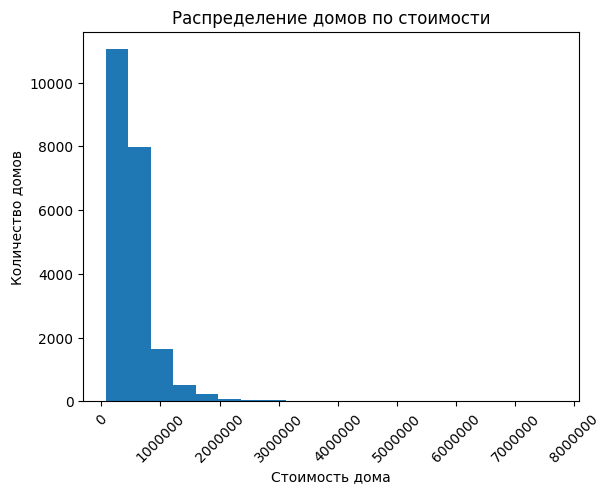

In [56]:
plt.hist(df['price'],bins=20)
plt.xlabel('Стоимость дома')
plt.ylabel('Количество домов')
plt.title('Распределение домов по стоимости')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45);

1.3. Изучите распределение квадратуры жилой

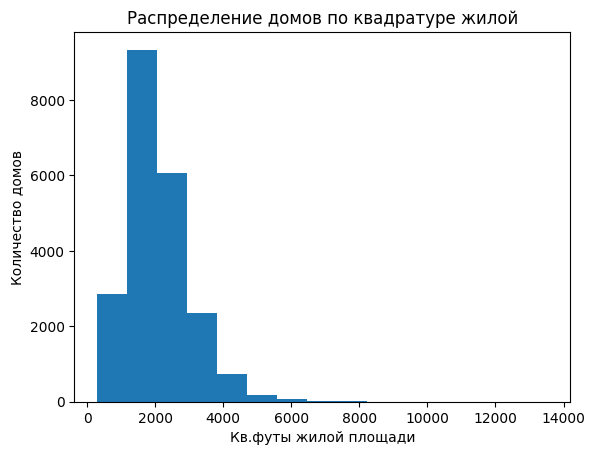

In [19]:
plt.hist(df['sqft_living'],bins=15)
plt.xlabel('Кв.футы жилой площади')
plt.ylabel('Количество домов')
plt.title('Распределение домов по квадратуре жилой');

1.4. Изучите распределение года постройки

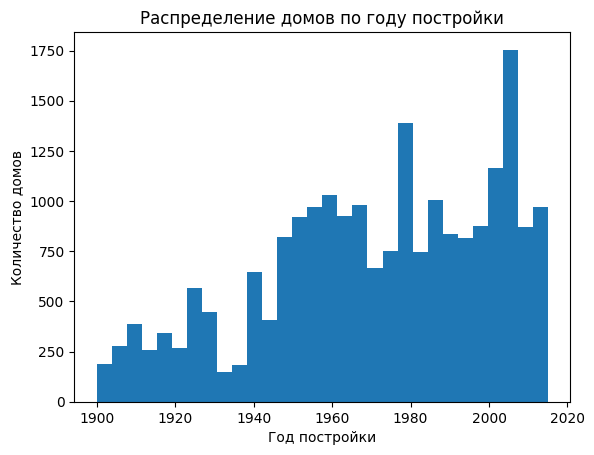

In [18]:
plt.hist(df['yr_built'],bins=30)
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.title('Распределение домов по году постройки');

# 2 задача

2.1. Изучите распределение домов от наличия вида на набережную

In [40]:
df1=df[['id','waterfront']].copy()
df1['waterfront2']='Нет'
df1.loc[df['waterfront'] !=0, 'waterfront2']='Есть'
df1=df1['waterfront2'].value_counts()
df1


waterfront2
Нет     21450
Есть      163
Name: count, dtype: int64

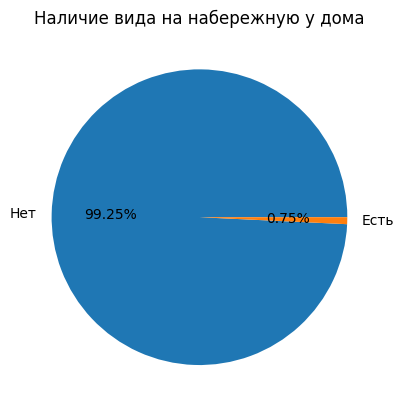

In [44]:
plt.pie(df1.values,labels=df1.index,autopct='%.2f%%')
plt.title('Наличие вида на набережную у дома');

2.2. Изучите распределение этажей домов

In [45]:
df1=df['floors'].value_counts()
df1

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

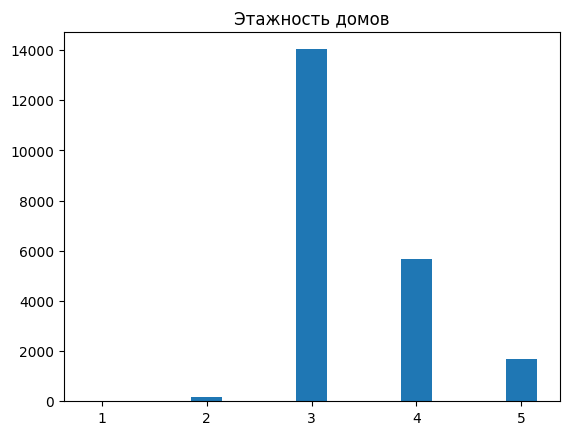

In [64]:
width=0.3
plt.bar(df1.index,df1.values,width=width)
plt.title('Этажность домов');

2.3. Изучите распределение состояния домов

In [58]:
df1=df['condition'].value_counts()
df1

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

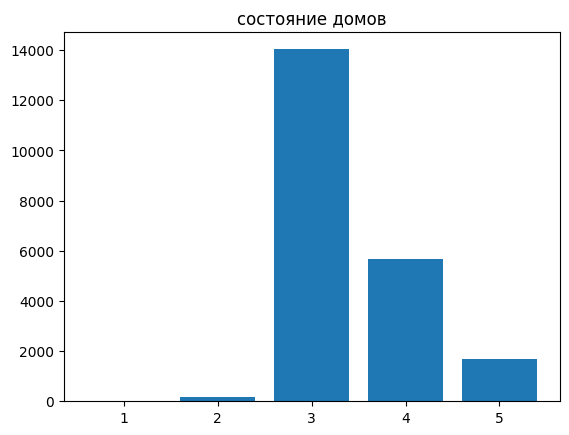

In [61]:
width=0.8
plt.bar(df1.index,df1.values,width=width)
plt.title('Состояние домов');

# Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [14]:
df2=df[['price','condition','grade','view','waterfront','sqft_lot','bedrooms','floors']]
matr=round(df2.corr(),2)
matr

,price,condition,grade,view,waterfront,sqft_lot,bedrooms,floors
price,1.00,0.04,0.67,0.40,0.27,0.09,0.31,0.26
condition,0.04,1.00,-0.14,0.05,0.02,-0.01,0.03,-0.26
grade,0.67,-0.14,1.00,0.25,0.08,0.11,0.36,0.46
view,0.40,0.05,0.25,1.00,0.40,0.07,0.08,0.03
waterfront,0.27,0.02,0.08,0.40,1.00,0.02,-0.01,0.02
sqft_lot,0.09,-0.01,0.11,0.07,0.02,1.00,0.03,-0.01
bedrooms,0.31,0.03,0.36,0.08,-0.01,0.03,1.00,0.18
floors,0.26,-0.26,0.46,0.03,0.02,-0.01,0.18,1.00


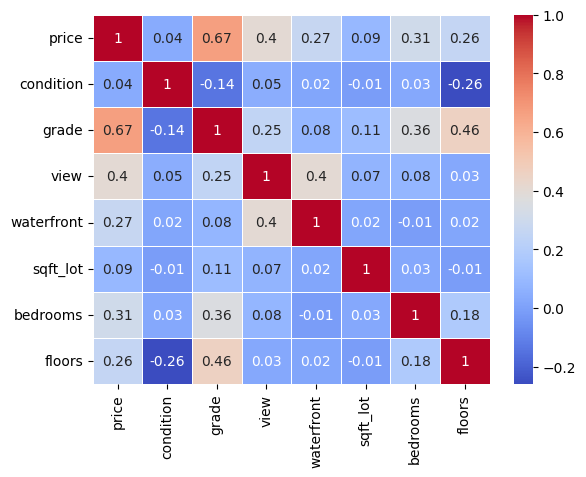

In [15]:
sns.heatmap(matr,annot=True,linewidths=0.5,cmap='coolwarm');

Вывод: сильнее всего стоимость домов коррелирует с показателем 'grade' и этажностью.

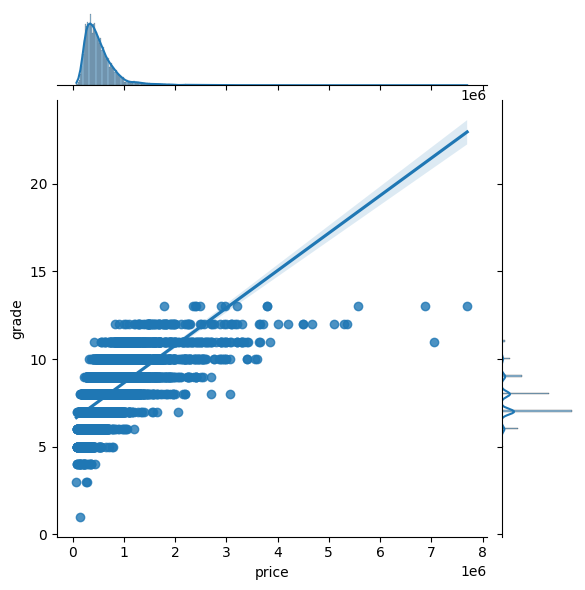

In [31]:
sns.jointplot(x='price',y='grade', data=df, kind='reg');

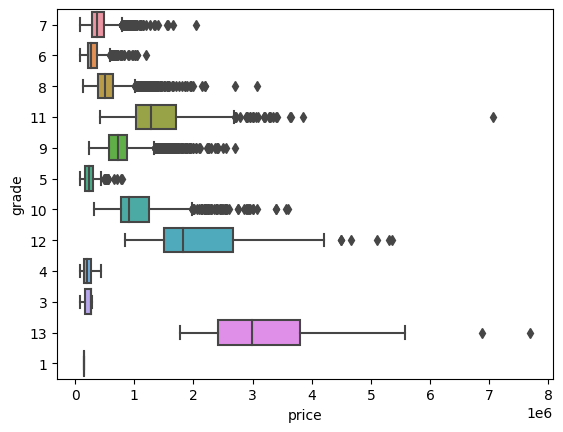

In [27]:
df['grade'] = df['grade'].apply(str)
sns.boxplot(x='price',y='grade', data=df);

Вывод: Влияние оценки дома на стоимость есть, прямая зависимость.

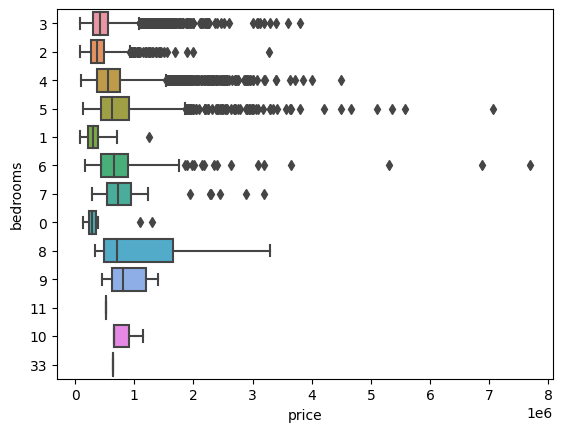

In [32]:
df['bedrooms'] = df['bedrooms'].apply(str)
sns.boxplot(x=df['price'],y=df['bedrooms'],whis=2);

Вывод: Влияние количества спален на стоимость есть, прямая зависимость.

In [19]:
df1=df[['price','waterfront']].copy()
df1['waterfront2']='Нет'
df1.loc[df['waterfront'] !=0, 'waterfront2']='Есть'
df1

,price,waterfront,waterfront2
0,221900.0,0,Нет
1,538000.0,0,Нет
2,180000.0,0,Нет
3,604000.0,0,Нет
4,510000.0,0,Нет
...,...,...,...
21608,360000.0,0,Нет
21609,400000.0,0,Нет
21610,402101.0,0,Нет
21611,400000.0,0,Нет


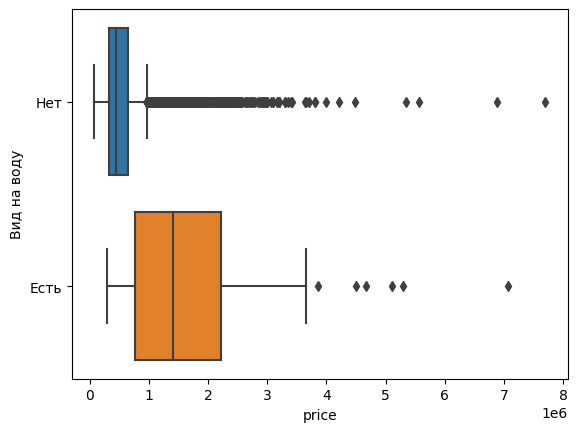

In [34]:
sns.boxplot(x=df1['price'],y=df1['waterfront2'],whis=1);
plt.ylabel('Вид на воду');

Вывод: Дома с видом на воду дороже.